# Mini-projet

- Sujet : Santé foetale
- Auteurs : Rémi Ançay & Lucas Charbonnier
- Professeur : Carlos Andrés Peña

## Analyse exploratoire de données

Source des données : https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In [100]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/fetal_health.csv')

In [101]:
print("Nombre d'enregistrements :", len(df))

Nombre d'enregistrements : 2126


In [102]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


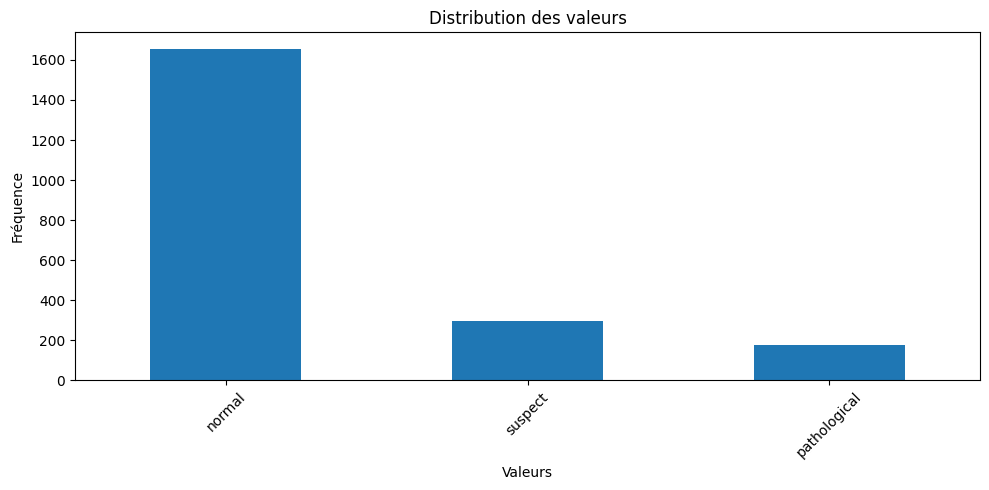

In [103]:
import matplotlib.pyplot as plt

value_counts = df['fetal_health'].value_counts()

plt.figure(figsize=(10, 5))
value_counts.plot(kind='bar')
plt.title("Distribution des valeurs")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.xticks([0,1,2],['normal', 'suspect', 'pathological'], rotation=45)
plt.tight_layout()
plt.show()


In [104]:
# Nombre total de NaN par colonne (trié, valeurs non nulles exclues)
nan_summary = df.isna().sum()
nan_summary = nan_summary[nan_summary > 0].sort_values(ascending=False)

# Résumé général
total_cells = df.size
total_nans = df.isna().sum().sum()
percent_nans = (total_nans / total_cells) * 100

# Aperçu condensé
print(f"Total de NaN dans le DataFrame : {total_nans} ({percent_nans:.2f}%)")
print(f"Nombre de colonnes avec au moins un NaN : {nan_summary.shape[0]} / {df.shape[1]}")

# Top 10 colonnes les plus affectées
print("\nTop 10 des colonnes avec le plus de NaN :")
print(nan_summary.head(10))


Total de NaN dans le DataFrame : 0 (0.00%)
Nombre de colonnes avec au moins un NaN : 0 / 22

Top 10 des colonnes avec le plus de NaN :
Series([], dtype: int64)


## Pré-traitement des données

In [105]:
def normalize(df):
    df_normalized = df.copy()

    for column in df_normalized.columns:
        min_value = df_normalized[column].min()
        max_value = df_normalized[column].max()
        df_normalized[column] = (df_normalized[column] - min_value) / (max_value - min_value)

    return df_normalized

In [106]:
from sklearn.model_selection import train_test_split
SEED = 42

X = df.drop(columns=['fetal_health'])
#X = normalize(X) PAS BESOIN DE NORMALISER

y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Modèle ante-hoc

todo

In [107]:
from fuzzycocopython import FuzzyCocoClassifier


# Create the model
fuzzyCoco_model = FuzzyCocoClassifier(random_state=SEED)


# Train our classifier and save the model to a file
fuzzyCoco_model.fit(X_train, y_train)

FuzzyCocoClassifier(random_state=42)

In [108]:
y_pred = fuzzyCoco_model.predict(X_test)

fuzzyCoco_model.score(X_test, y_test)

0.176056338028169

In [109]:
# visualize the rules
print(fuzzyCoco_model.rules_)
print(fuzzyCoco_model.default_rules_)

[IF (Feature_7 is Low), THEN (OUT is Low)]
[ELSE (OUT is High)]


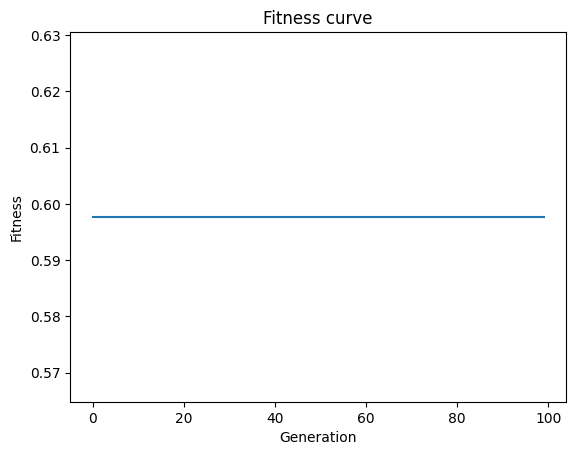

In [110]:
# plot the fitness curve 

plot = fuzzyCoco_model.fitness_history_
plt.plot(plot)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness curve')
plt.show()

## Explication post-hoc

### Création du modèle de classification

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def show_confusion_matrix(y_true, y_pred, show_report=True):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['normal', 'suspect', 'pathological'],
                yticklabels=['normal', 'suspect', 'pathological'])
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités')
    plt.title('Matrice de confusion')
    plt.show()
    if show_report:
        print(classification_report(y_true, y_pred, target_names=['normal', 'suspect', 'pathological']))


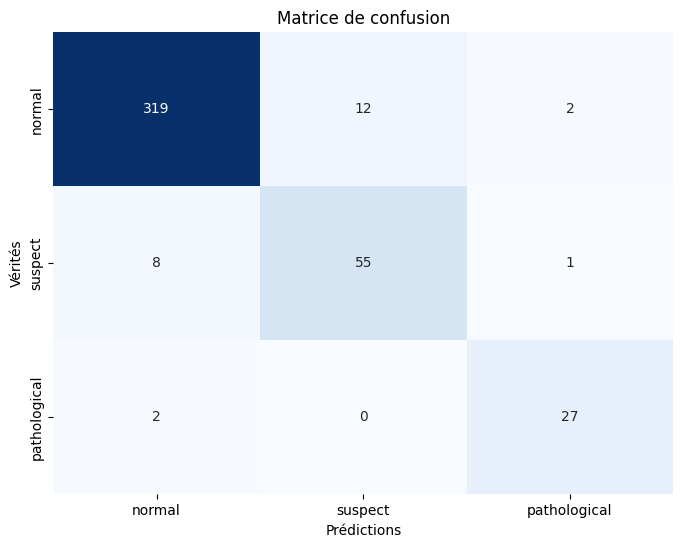

              precision    recall  f1-score   support

      normal       0.97      0.96      0.96       333
     suspect       0.82      0.86      0.84        64
pathological       0.90      0.93      0.92        29

    accuracy                           0.94       426
   macro avg       0.90      0.92      0.91       426
weighted avg       0.94      0.94      0.94       426



In [112]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=SEED)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

show_confusion_matrix(y_test, y_pred_dt)


### Explication globale

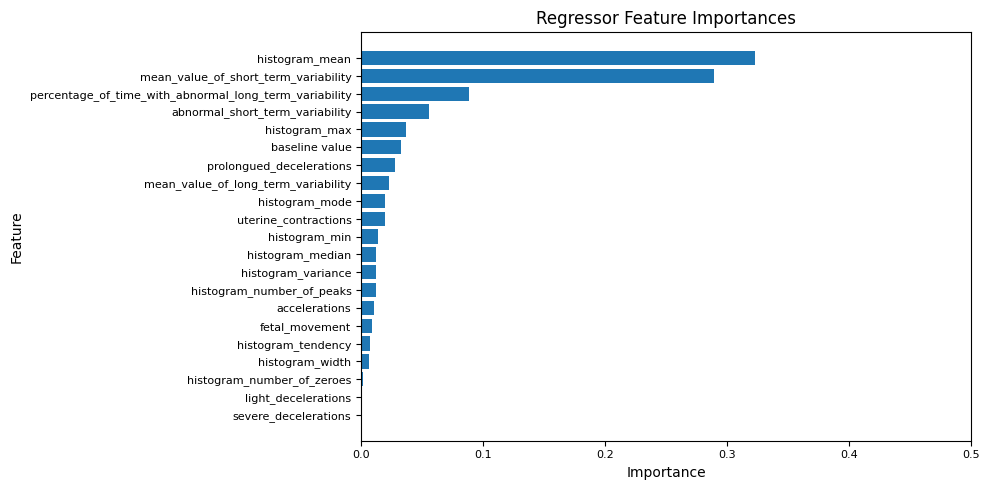

In [113]:
def show_feature_importances(re_importances):
    # Create a figure with one subplot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the second set of data
    sorted_idx = re_importances.argsort()[::-1]
    sorted_importances = re_importances[sorted_idx][::-1]
    sorted_features = X.columns[sorted_idx][::-1]

    ax.barh(sorted_features, sorted_importances)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    ax.set_title('Regressor Feature Importances')
    ax.yaxis.set_ticks(sorted_features)
    ax.tick_params(axis='x', labelsize=8)
    ax.set_yticklabels(sorted_features, fontsize=8)
    ax.set_xlim([0, 0.5])

    # Adjust the layout of the subplot
    fig.tight_layout()

    # Show the plot
    plt.show()

re_importances = dt.feature_importances_
show_feature_importances(re_importances)

Le modèle nous met à disposition les features les plus importantes pour la classification.

Cela est déjà très intéressant et nous permet de voir quelles sont les features qui ont le plus d'impact sur la classification.

Cependant, nous allons utiliser des méthodes d'explication POST-HOC pour expliquer le modèle de manière plus précise.

In [114]:
import shap

explainer = shap.TreeExplainer(dt, feature_names=X_test.columns.tolist())
shap_values = explainer.shap_values(X_test)

pd.DataFrame(shap_values, columns=X_test.columns.tolist()).head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.008573,-0.002662,-0.006293,0.002007,-0.000672,0.0,-0.016961,-0.032291,-0.089633,-0.057908,...,-0.003253,-0.012452,0.002112,0.000209,-0.000801,-0.006831,-0.094367,-0.006009,0.006153,0.000278
1,-0.023715,0.017497,-0.002314,-0.024943,-0.000647,0.0,-0.008580,-0.000660,-0.069446,-0.067569,...,-0.003431,-0.009839,0.001096,-0.000416,-0.001539,0.002468,-0.108713,-0.001285,0.002327,0.003066
2,-0.010759,-0.028256,-0.002582,-0.006292,-0.000685,0.0,-0.009404,-0.000904,-0.062532,-0.068457,...,-0.003550,-0.004728,0.002693,0.008995,-0.001539,-0.005937,-0.101160,-0.001702,0.001635,0.000274
3,-0.008723,-0.022918,-0.001939,-0.007073,-0.000685,0.0,-0.017064,-0.023619,-0.061563,-0.064881,...,-0.002999,-0.009559,0.002936,0.011172,-0.000801,-0.005493,-0.098719,0.001910,0.002653,0.000596
4,-0.023941,0.017518,-0.000776,-0.021447,-0.000646,0.0,-0.008936,0.003036,-0.065876,-0.068983,...,-0.003227,-0.009430,0.003131,-0.000416,-0.001539,-0.003096,-0.111111,0.001390,0.002015,-0.000937


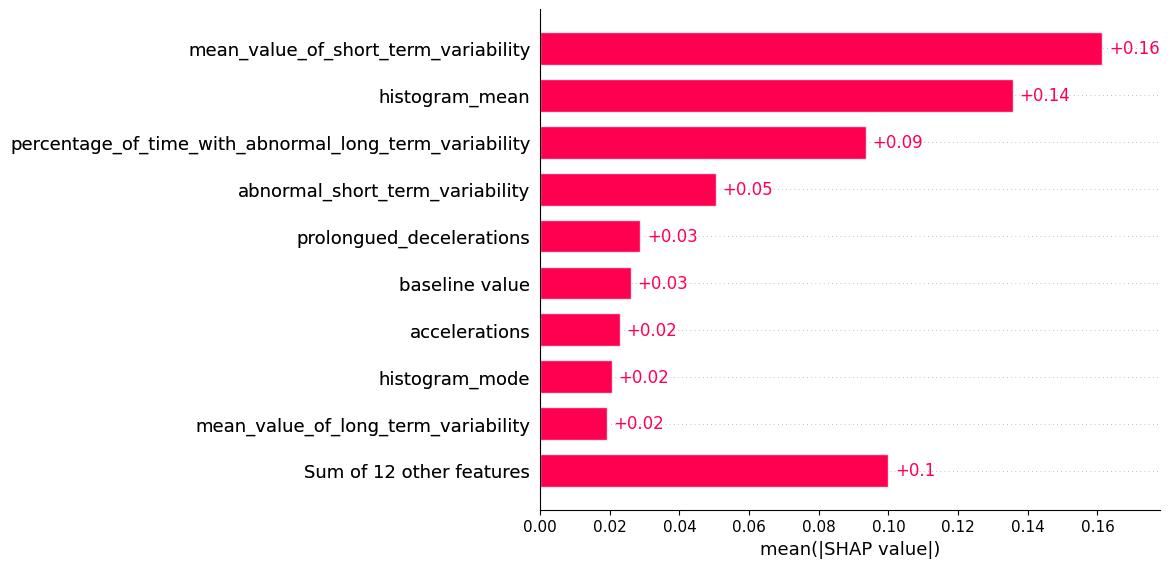

In [115]:
import shap.plots

shap_values_plot = explainer(X_test)
shap.plots.bar(shap_values_plot)

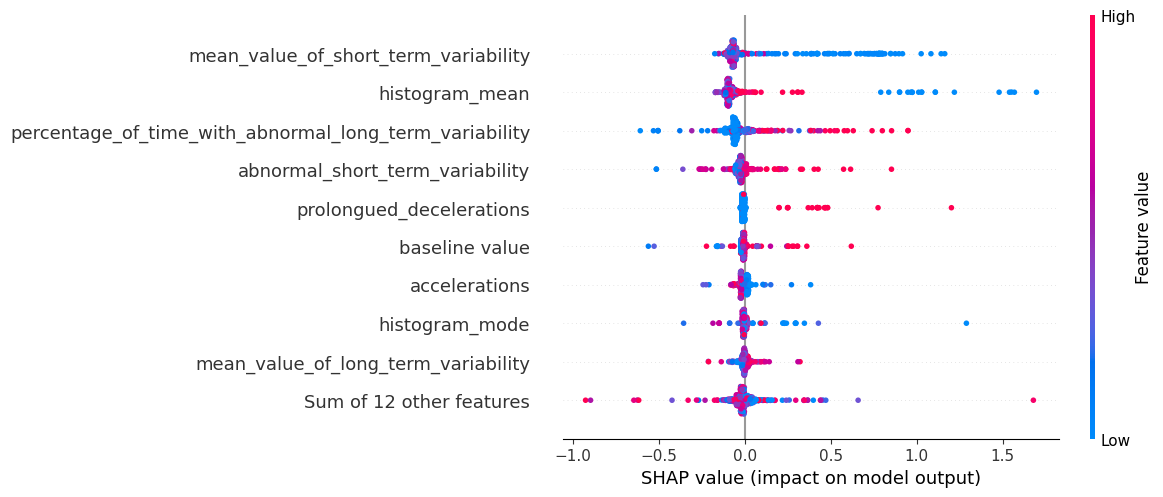

In [116]:
shap.plots.beeswarm(shap_values_plot)

### Explication locale

In [117]:
correct_index = 66 # Index of a correct prediction
incorrect_index = 60 # Index of an incorrect prediction

correct_row = X_test.iloc[correct_index]
incorrect_row = X_test.iloc[incorrect_index]

comparison_df = pd.DataFrame({
    f"Correct (index {correct_index})": correct_row,
    f"Incorrect (index {incorrect_index})": incorrect_row
})

print("Index : ", correct_index, " | Valeurs réelles : ", y_test.iloc[correct_index], " | Prédictions : ", y_pred_dt[correct_index])
print("Index : ", incorrect_index, " | Valeurs réelles : ", y_test.iloc[incorrect_index], " | Prédictions : ", y_pred_dt[incorrect_index])

comparison_df.style.set_caption("Comparaison des valeurs de features")

Index :  66  | Valeurs réelles :  2.0  | Prédictions :  2.0
Index :  60  | Valeurs réelles :  2.0  | Prédictions :  1.0


,Correct (index 66),Incorrect (index 60)
baseline value,159.000000,159.000000
accelerations,0.000000,0.000000
fetal_movement,0.000000,0.000000
uterine_contractions,0.003000,0.008000
light_decelerations,0.000000,0.000000
severe_decelerations,0.000000,0.000000
prolongued_decelerations,0.000000,0.000000
abnormal_short_term_variability,65.000000,66.000000
mean_value_of_short_term_variability,0.400000,0.400000
percentage_of_time_with_abnormal_long_term_variability,11.000000,13.000000


Waterfall plot for correct prediction (index 66) true label: 2.0 predicted label: 2.0


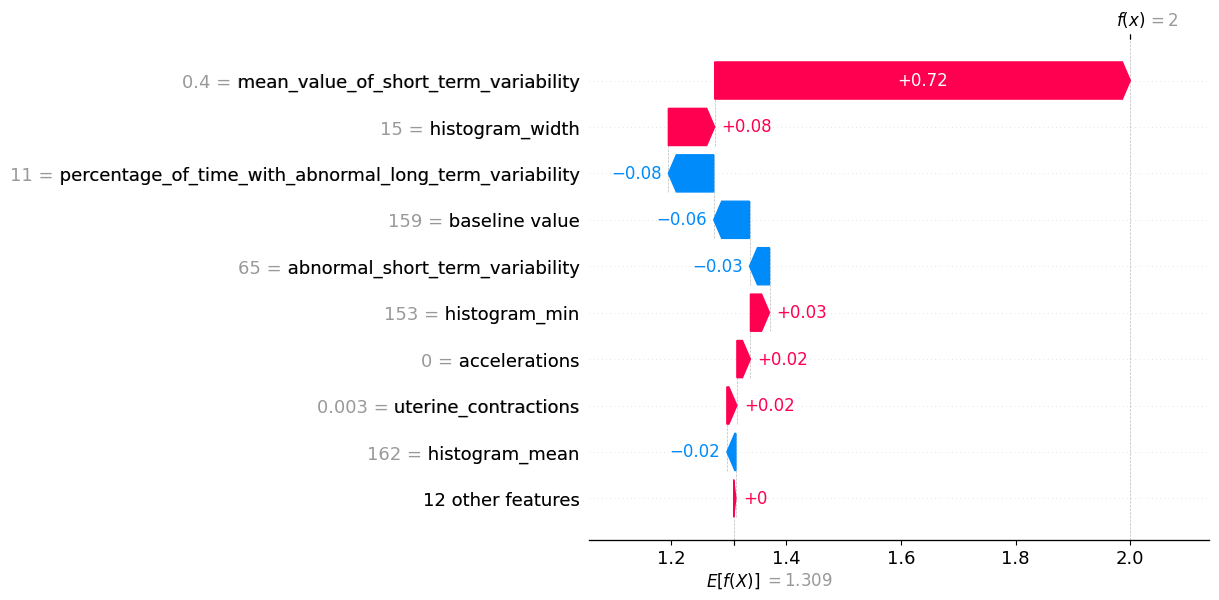

Waterfall plot for incorrect prediction (index 60) true label: 2.0 predicted label: 1.0


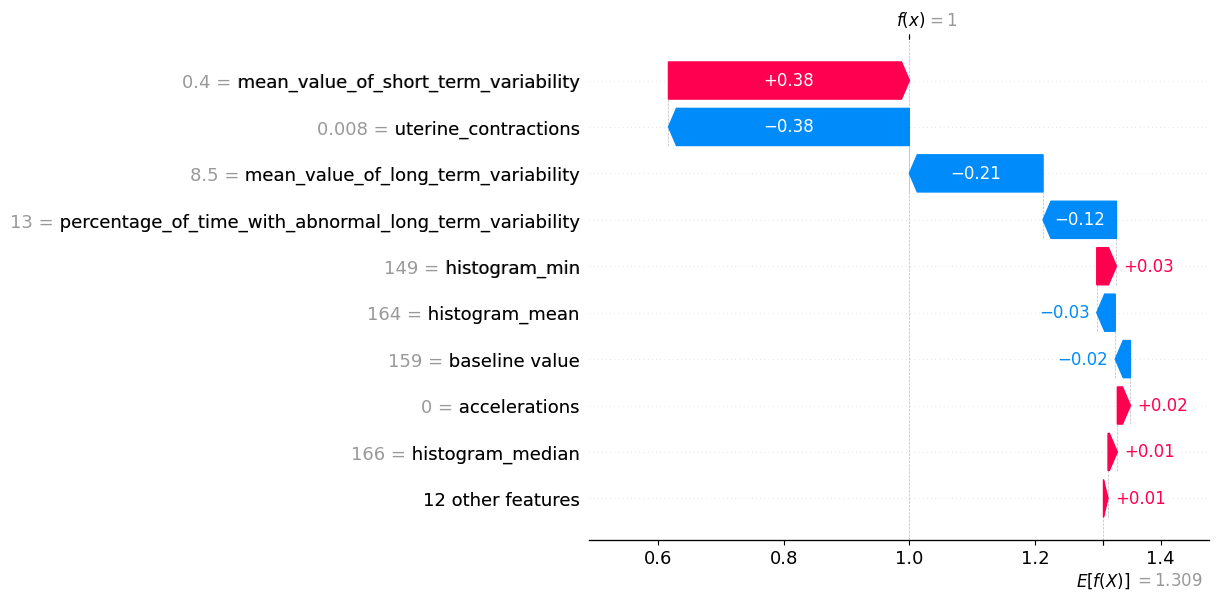

In [118]:
shap_values = shap_values = explainer(X_test)

print(f"Waterfall plot for correct prediction (index {correct_index}) true label: {y_test.iloc[correct_index]} predicted label: {y_pred_dt[correct_index]}")
shap.plots.waterfall(shap_values[correct_index], )

print(f"Waterfall plot for incorrect prediction (index {incorrect_index}) true label: {y_test.iloc[incorrect_index]} predicted label: {y_pred_dt[incorrect_index]}")
shap.plots.waterfall(shap_values[incorrect_index])

In [119]:
from lime.lime_tabular import *

explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['fetal_health'],
    mode='regression')

In [120]:
#Show correct prediction
exp = explainer.explain_instance(
    data_row=X_test.iloc[correct_index], 
    predict_fn=dt.predict
)

exp.show_in_notebook(show_table=True)

c:\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Python312\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column 

In [121]:
#Show incorrect prediction
exp = explainer.explain_instance(
    data_row=X_test.iloc[incorrect_index], 
    predict_fn=dt.predict
)

exp.show_in_notebook(show_table=True)

c:\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Python312\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column 

TODO evaluation, explication et description de toute la partie POST-HOC

## Analyse des résultats

todo : pas oublier de justifier les choix des modèles

### Comparaison des modèles XAI

todo : comparaison des modèles ante-hoc et post-hoc -> performance + inteprétabilité

### Interprétations globales et locales

todo

